In [1]:
from glob import glob
import re
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
heart_rate_list = glob("heart_rate/*/*.json")

## JSON to Pandas DataFrame

In [3]:
# Many JSON file in one Pandas DataFrame
df = pd.DataFrame()
for file in tqdm(heart_rate_list):
    df = df.append(pd.read_json(file))

# Drop unused columns
df = df.drop(columns=['heart_rate_max', 'heart_rate_min', 'end_time'])

# Drop duplicates start_time column
df = df.drop_duplicates(subset='start_time')

# Change column name heart_rate to bpm
df = df.rename(columns={'heart_rate': 'bpm'})

df = df.set_index('start_time')
df = df.sort_index()

df.head()

100%|██████████| 16822/16822 [01:29<00:00, 188.52it/s]


,bpm
start_time,
2019-09-19 08:23:00,84
2019-09-19 08:24:00,98
2019-09-19 08:25:00,90
2019-09-19 08:26:00,104
2019-09-19 08:27:00,106


## Line Plot

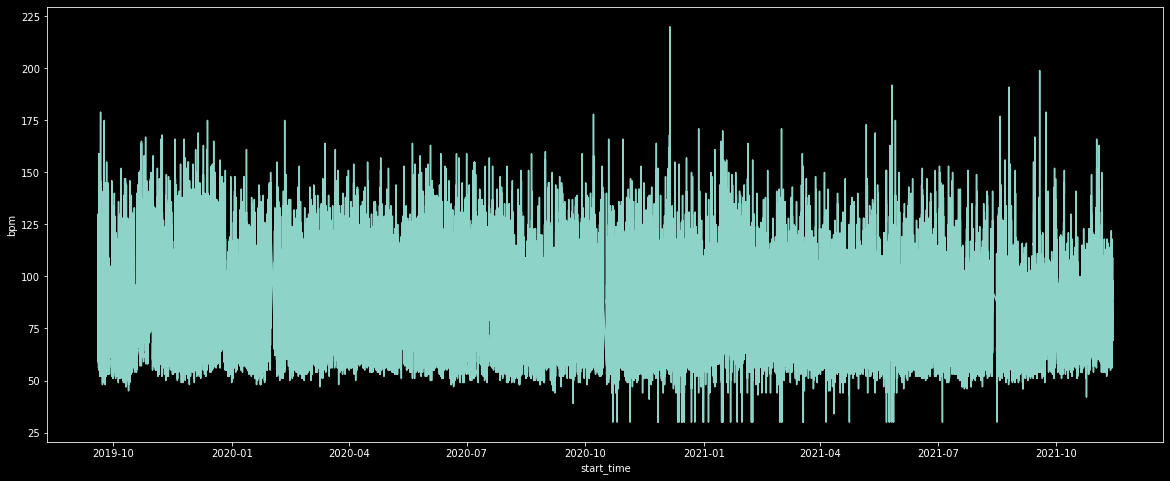

In [4]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df.index, y=df.bpm)
plt.show()

## KDE Plot

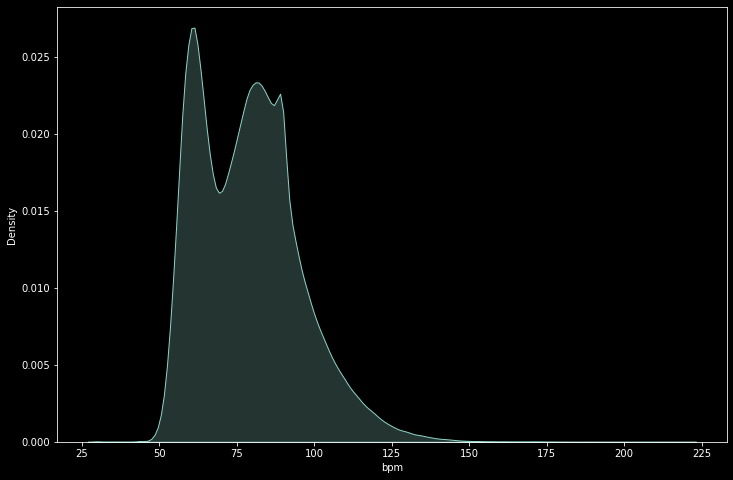

In [5]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=df.bpm, fill=True)
plt.show()

## Filter by Date

In [6]:
df_211108 = df.loc['2021-11-08 00:00:00':'2021-11-08 23:59:59']
df_211108

,bpm
start_time,
2021-11-08 00:00:00,59
2021-11-08 00:01:00,61
2021-11-08 00:02:00,60
2021-11-08 00:03:00,60
2021-11-08 00:04:00,60
...,...
2021-11-08 23:55:00,62
2021-11-08 23:56:00,56
2021-11-08 23:57:00,55


## Line Plot at 2021-11-08

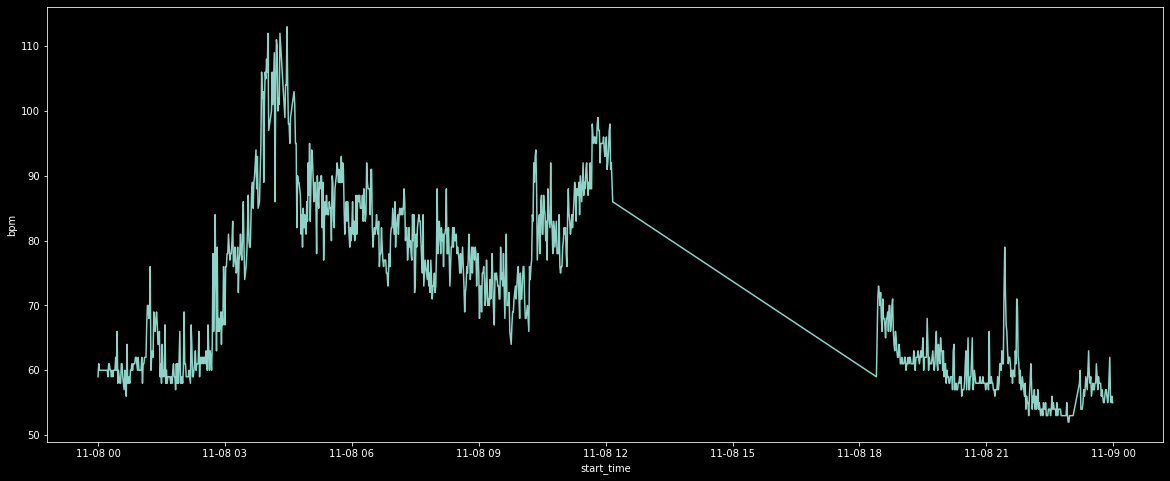

In [7]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211108.index, y=df_211108.bpm)
plt.show()

## Notes

In [8]:
notes = [{
        'time': '2021-11-08 12:45:00',
        'note': 'idk'
    }, {
        'time': '2021-11-08 17:00:00',
        'note': 'ummm'
    }, {
        'time': '2021-11-08 18:10:00',
        'note': 'what'
}]

## Get Nearest Index by Datetime

In [9]:
dt = pd.to_datetime('2021-11-08 12:45:00')

df_211108.index.get_loc(dt, method='nearest')

711

## Heart Rate Note

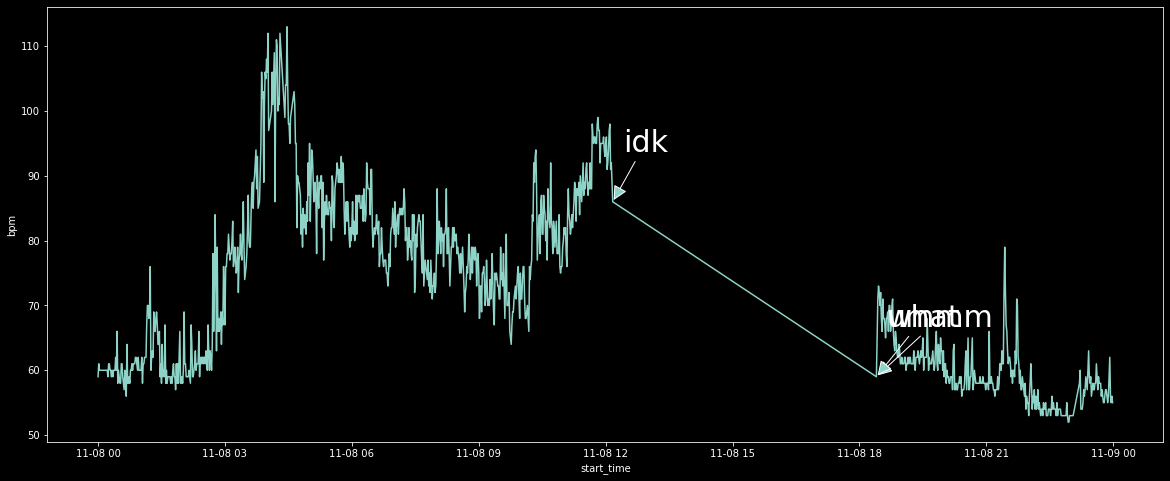

In [10]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211108.index, y=df_211108.bpm)

for note in notes:
    dt = pd.to_datetime(note['time'])
    idx = df_211108.index.get_loc(dt, method='nearest')

    plt.annotate(
        note['note'],
        (df_211108.iloc[idx].name, df_211108.iloc[idx].bpm),
        xytext=(10, 50), 
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>'),
        fontsize=30
    )

plt.show()